# Regression on Diabetes data 

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Number of Instances:
442

Number of Attributes:
First 10 columns are numeric predictive values

Target:
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
- age age in years

- sex

- bmi body mass index

- bp average blood pressure

- s1 tc, total serum cholesterol

- s2 ldl, low-density lipoproteins

- s3 hdl, high-density lipoproteins

- s4 tch, total cholesterol / HDL

- s5 ltg, possibly log of serum triglycerides level

- s6 glu, blood sugar level

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
diabetes = load_diabetes()


In [3]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


## make dataframe

In [4]:
df = pd.DataFrame(diabetes.data,columns = diabetes.feature_names)
display(df)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
df.isna().sum()
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [7]:
def return_perf(clf):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    #mape = mean_absolute_percentage_error(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'mse = {mse}')
    return mse


## try compare different models with default parameters
models = {"linear":LinearRegression(), "lasso":Lasso(), "ridge":Ridge(), "svr":SVR()}
models_perf = {}
for name,clf in models.items():
    print(name, end=':')
    out = return_perf(clf)
    models_perf[name] = out

    

linear:mse = 2900.1936284934823
lasso:mse = 3403.5757216070747
ridge:mse = 3077.41593882723
svr:mse = 4333.285954518086


Text(0.5, 1.0, 'MSE loss')

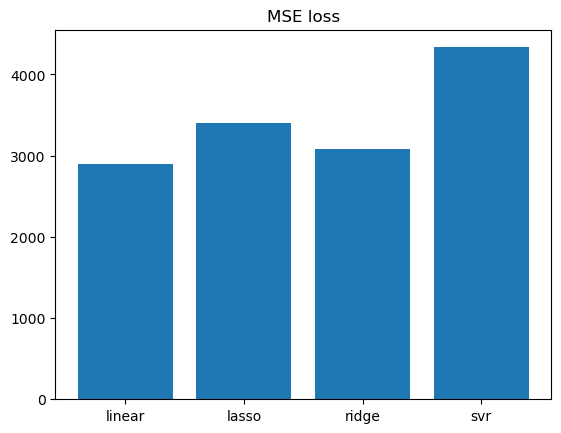

In [8]:
plt.bar(*zip(*models_perf.items()))
plt.title("MSE loss")

In [9]:
## try gridsearch
best_models = {}
models = {
    'linear': {'model': LinearRegression()},
    'ridge': {'model': Ridge(), 'param_grid': {'alpha': [0.1, 1, 10]}},
    'lasso': {'model': Lasso(), 'param_grid': {'alpha': [0.1, 1, 10]}},
    'svr': {'model': SVR(), 'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}}
}




In [14]:
model_results = {}
for name, model_params in models.items():
    model = model_params['model']
    if 'param_grid' in model_params:
        grid_search = GridSearchCV(model, model_params['param_grid'], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model
    model_results[name] = best_model
    
model_results   


{'linear': LinearRegression(),
 'ridge': Ridge(alpha=0.1),
 'lasso': Lasso(alpha=0.1),
 'svr': SVR(C=10)}

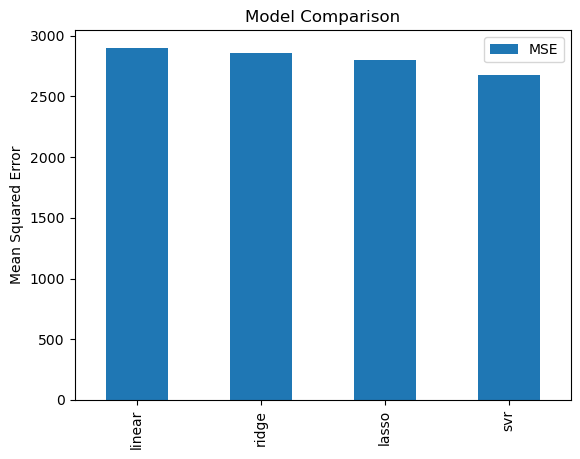

In [11]:
model_scores = {}
for name, model in model_results.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_scores[name] = mse

# Convert to DataFrame for easier visualization
model_scores_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['MSE'])

# Plot bar chart
model_scores_df.plot(kind='bar')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.show()